In [68]:
%matplotlib inline

In [119]:
import pandas as pd
import numpy as np
import seaborn as sbn
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from itertools import chain

In [70]:
img = mpimg.imread('data/wuhan.png')

In [72]:
def get_borderless_fig(figsize=(5, 5)):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    ax.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
    return fig, ax

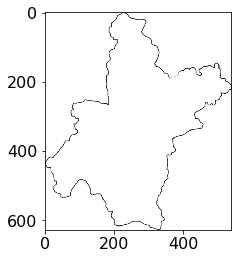

In [76]:
plt.imshow(img)

In [112]:
def gen_normal(mean, std, num):
    xy = np.random.multivariate_normal(mean, [[std, 0], [0, std]], num)
    return xy

In [165]:
def gen_uniform(num, x_min=0, x_max=500, y_min=0,  y_max=620):
    x = np.random.uniform(x_min, x_max, size=num)
    y = np.random.uniform(y_min, y_max, size=num)
    return np.concatenate((x[:, None],  y[:, None]), axis=1)

In [248]:
# E, I, M, O
lockdown_counts = np.array([7676, 1999, 2877])
peak_counts = np.array([5585, 2662, 17499])
sixty_days_after_ld_counts = np.array([2662, 544, 8939])
day_of_lift_ld_counts = np.array([863, 168, 2911])

two_months_after_ld_lift_counts = np.array([3120, 523, 5726])
four_months_after_ld_lift_counts = np.array([11203, 2314, 20516])

In [258]:
max_num_pts = 1500
total_by_case = data.sum(axis=1)
num_pts_by_case = (total_by_case / total_by_case.max()) * max_num_pts
num_pts_by_case

array([ 553.22774954, 1134.75156466,  535.28927805,  173.74313167,
       1500.        ])

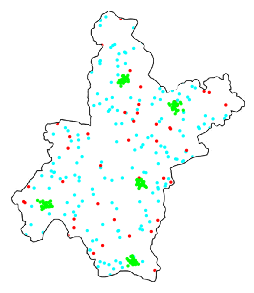

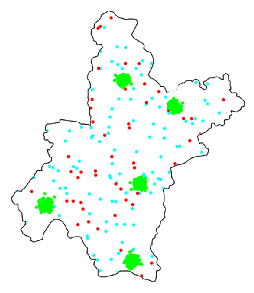

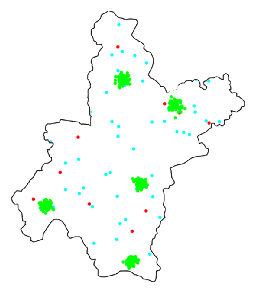

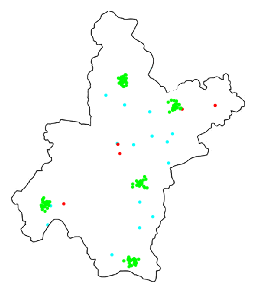

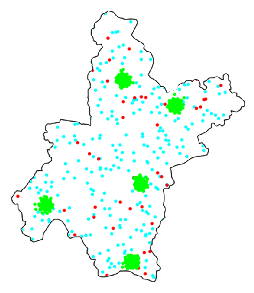

In [265]:
data = [
    lockdown_counts,
    peak_counts,
    sixty_days_after_ld_counts,
    day_of_lift_ld_counts,
    two_months_after_ld_lift_counts,
    four_months_after_ld_lift_counts
]
data = np.array(data)
names = [
    'at-lockdown',
    'at-peak',
    '60-days-after-lockdown',
    'at-lockdown-lift-150-days',
    '60-days-after-lockdown-lift'
    '120-days-after-lockdown-lift'
]
for num_pts, name, counts in zip(num_pts_by_case,  names, data):
    fig, ax = draw_by_spec(counts, int(num_pts))
    fig.savefig(f'figs/illustration/{name}.pdf')

In [260]:
df = pd.DataFrame(np.array(data), index=names, columns=list('EIM'))
df.to_csv('figs/illustration/stat.csv')

In [263]:
def draw_by_spec(counts,  total):
    np.random.seed(12345)
    perc = counts  / counts.sum()
    norm_counts = list(map(int, perc * total))

    E_xy = gen_uniform(norm_counts[0])
    I_xy = gen_uniform(norm_counts[1])

    hospital_pos = [
        (260,  160), (380, 220),  (280, 580), (80, 450), (300, 400)
    ]
    num_hospitals = 5
    num_per_hos = int(norm_counts[2] / num_hospitals)
    M_xy_list = []
    for pos, i in zip(hospital_pos, range(num_hospitals)):
        part = gen_normal(pos, 50, num_per_hos)
        M_xy_list.append(part)

    M_xy = np.concatenate(M_xy_list)
    xy = np.concatenate([E_xy, I_xy, M_xy])

    colors = list(chain(
        *[([color] * xy.shape[0])
          for color, xy in zip(['aqua', 'red', 'lime'], [E_xy, I_xy, M_xy])]
    ))

    fig, ax = get_borderless_fig()
    ax.scatter(xy[:, 0], xy[:, 1], zorder=0, s=5, c=colors)
    imgplot = ax.imshow(img,  zorder=1)
    return fig, ax